Getting Started; Openning and Exploring the Data

In [57]:
import numpy as np
import pandas as pd

# Uncomment and update the file name below after checking the available files
df = pd.read_csv("Machinery_dataset_service.csv")
print(df.head())       # View the first few rows

   Factor Year Factor Number Factor Date Customer ID         Order ID  \
0         2021    IA  000001  2021-01-06      cust01  2020/ON  003184   
1         2021    IT  000273  2021-01-31      cust02  2020/ON  007836   
2         2021    IT  000278  2021-01-31      cust03  2020/ON  001385   
3         2021    IT  000279  2021-01-31      cust04  2020/ON  008522   
4         2021    IT  000287  2021-01-31      cust05  2020/ON  008326   

       Start of rental        End of rental Machine ID              POLI Line  \
0  2020-06-03 00:00:00  2021-04-01 00:00:00    CLI1113  Silver Rent Allestiti   
1  2020-11-18 00:00:00  2021-03-09 00:00:00    CLI1097  Silver Rent Allestiti   
2  2020-02-20 00:00:00  2022-01-21 00:00:00    CLI0973    Silver Rent Furgoni   
3  2020-11-11 00:00:00  2021-06-18 00:00:00    CLI1098    Silver Rent Furgoni   
4  2020-11-30 00:00:00  2021-02-11 00:00:00       A181    Silver Rent Furgoni   

    Product Group Product Category  Amount Row Reason  Days Sold  \
0  Ren

In [58]:
# Step 1: getting to know the data
print(df.info())       # Get data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43117 entries, 0 to 43116
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Factor Year       43117 non-null  int64  
 1   Factor Number     43117 non-null  object 
 2   Factor Date       43117 non-null  object 
 3   Customer ID       43117 non-null  object 
 4   Order ID          43117 non-null  object 
 5   Start of rental   43091 non-null  object 
 6   End of rental     43091 non-null  object 
 7   Machine ID        43117 non-null  object 
 8   POLI Line         43117 non-null  object 
 9   Product Group     43117 non-null  object 
 10  Product Category  40518 non-null  object 
 11  Amount            43117 non-null  float64
 12  Row Reason        43117 non-null  object 
 13  Days Sold         43117 non-null  float64
 14  Warehouse Unit    43117 non-null  object 
 15  Sales Quantity    43117 non-null  float64
 16  Sales Unit        43117 non-null  object

In [59]:
print(df.describe())   # Summary statistics for numerical columns

        Factor Year        Amount     Days Sold  Sales Quantity         Month
count  43117.000000  43117.000000  43117.000000    43117.000000  43097.000000
mean    2022.622794    706.860098      9.373785        6.487059      6.507042
std        1.152661    859.054978      9.850304        8.763374      3.418826
min     2021.000000   -180.000000     -3.000000        0.000000      1.000000
25%     2022.000000    130.000000      1.000000        1.000000      4.000000
50%     2023.000000    400.000000      5.000000        3.000000      6.000000
75%     2024.000000   1000.000000     20.000000        9.500000     10.000000
max     2024.000000  25200.000000    309.000000      828.000000     12.000000


In [60]:
### Step 2: handling null values, duplicates and anomalities
#  recognize Null values 
df.replace(["N\D", "#N/A", "NA", "nd", "-"], pd.NA, inplace=True)  # Convert specified values to null (NaN)

# Drop duplicated rows
df = df.drop_duplicates()

# Drop null values in specific columns (use the current column names)
df = df.dropna(subset=[
	'Factor Year', 'Factor Number', 'Customer ID', 'Order ID', 'Start of rental', 'End of rental'
])

In [61]:
## Step 3 : filtering the data
# Convert "Amount" to numeric where possible.
# Non-numeric entries will become NaN.
df["Amount_numeric"] = pd.to_numeric(df["Amount"], errors="coerce")

# Create a filter:
#  - Keep rows where the numeric conversion is NaN (i.e. the original "Amount" could not be converted, likely "-")
#  - Or, where the numeric value is non-negative.
df = df[(df["Amount_numeric"].isna()) | (df["Amount_numeric"] >= 0)].copy()

# Optionally, drop the temporary numeric column if no longer needed.
df.drop(columns=["Amount_numeric"], inplace=True)

# Display the resulting DataFrame.
print(df.head())

   Factor Year Factor Number Factor Date Customer ID         Order ID  \
0         2021    IA  000001  2021-01-06      cust01  2020/ON  003184   
1         2021    IT  000273  2021-01-31      cust02  2020/ON  007836   
2         2021    IT  000278  2021-01-31      cust03  2020/ON  001385   
3         2021    IT  000279  2021-01-31      cust04  2020/ON  008522   
4         2021    IT  000287  2021-01-31      cust05  2020/ON  008326   

       Start of rental        End of rental Machine ID              POLI Line  \
0  2020-06-03 00:00:00  2021-04-01 00:00:00    CLI1113  Silver Rent Allestiti   
1  2020-11-18 00:00:00  2021-03-09 00:00:00    CLI1097  Silver Rent Allestiti   
2  2020-02-20 00:00:00  2022-01-21 00:00:00    CLI0973    Silver Rent Furgoni   
3  2020-11-11 00:00:00  2021-06-18 00:00:00    CLI1098    Silver Rent Furgoni   
4  2020-11-30 00:00:00  2021-02-11 00:00:00       A181    Silver Rent Furgoni   

    Product Group Product Category  Amount Row Reason  Days Sold  \
0  Ren

In [62]:
## Step 4: Recognizing Date Anomalities
# changing the format to datetime 
df["Start of rental"] = pd.to_datetime(df["Start of rental"], errors="coerce")
df["End of rental"] = pd.to_datetime(df["End of rental"], errors="coerce")

# filtering anomalities of time
df_unusual_contracts = df[
    (df["Start of rental"] <= pd.Timestamp("2010-01-01")) | 
    (df["End of rental"] >= pd.Timestamp("2040-12-31"))
].copy()

# Keeping the useful timeframe
df = df[
    (df["Start of rental"] > pd.Timestamp("2010-01-01")) & 
    (df["End of rental"] < pd.Timestamp("2040-12-31"))
].copy()

# checkiing the number of rows
print(f"✅ usual contracts {df.shape[0]}")
print(f"❌ unusual contract: {df_unusual_contracts.shape[0]}")

✅ usual contracts 43045
❌ unusual contract: 25


In [63]:
# Display the unusual contracts identified earlier
df_unusual_contracts. head(10)

,Factor Year,Factor Number,Factor Date,Customer ID,Order ID,Start of rental,End of rental,Machine ID,POLI Line,Product Group,Product Category,Amount,Row Reason,Days Sold,Warehouse Unit,Sales Quantity,Sales Unit,Final Line,Month
29563,2024,IT 007863,2024-11-30,cust1109,2024/ON 008827,1900-01-01,NaT,V104,<NA>,<NA>,NaN,820.0,ADS,41.0,GG,41.0,GG,xxx,11.0
33477,2024,IT 001769,2024-03-26,cust1378,2024/ON 001990,1900-01-01,NaT,S831,Semoventi Girevoli Articolati Dsl,Rotating Boom Lifts,Articulated Electric Boom Lifts,1520.0,ADN,16.0,GG,16.0,GG,xxx,3.0
33478,2024,IT 001770,2024-03-26,cust1378,2024/ON 001989,1900-01-01,NaT,T102,Sollevatori Telescopici Fissi,Telehandlers,Fixed Telehandlers,1680.0,ADN,16.0,GG,16.0,GG,xxx,3.0
35481,2024,IT 001550,2024-03-08,cust1378,2024/ON 001989,1900-01-01,NaT,T102,Sollevatori Telescopici Fissi,Telehandlers,Fixed Telehandlers,420.0,ADN,4.0,GG,4.0,GG,xxx,3.0
35482,2024,IT 001551,2024-03-08,cust1378,2024/ON 001990,1900-01-01,NaT,S831,Semoventi Girevoli Articolati Dsl,Rotating Boom Lifts,Articulated Electric Boom Lifts,380.0,ADN,4.0,GG,4.0,GG,xxx,3.0
36126,2024,IT 006645,2024-09-30,cust15,2024/CC 000659,1900-01-01,2024-09-19,S614,Semoventi Verticali Ele,Vertical Lifts,Electric Vertical Lifts,105.0,ADN,3.0,GG,3.0,GG,xxx,9.0
36314,2024,IT 000853,2024-02-14,cust669,2024/ON 001124,1900-01-01,NaT,A220,Silver Rent Furgoni,Rent Vans,Rent Vans,115.0,ADS,2.0,GG,2.0,GG,xxx,2.0
36577,2024,IA 000463,2024-06-21,cust1518,2024/ON 004734,1900-01-01,NaT,A229,Silver Rent Furgoni,Rent Vans,Rent Vans,250.0,ADN,2.0,GG,2.0,GG,xxx,6.0
36603,2024,IT 004529,2024-06-30,cust1520,2024/ON 005233,1900-01-01,NaT,S788,Semoventi Girevoli Articolati Dsl,Rotating Boom Lifts,Articulated Diesel Boom Lifts,200.0,ADN,2.0,GG,2.0,GG,xxx,6.0
36698,2024,IT 005944,2024-08-31,cust120,2024/ON 006468,1900-01-01,NaT,P88,Macchine con Operatore,Machines with Operator,Machines with Operator,2240.0,ANC,2.0,H,2.0,GG,xxx,8.0


In [64]:
# Recalculate most recent and oldest dates
print("\n📌 After Filtering:")
print(f"Oldest 'Start of rental': {df['Start of rental'].min()}")
print(f"Most Recent 'Start of rental': {df['Start of rental'].max()}")
print(f"Oldest 'End of rental': {df['End of rental'].min()}")
print(f"Most Recent 'End of rental': {df['End of rental'].max()}")


📌 After Filtering:
Oldest 'Start of rental': 2014-07-22 00:00:00


Most Recent 'Start of rental': 2025-01-08 00:00:00
Oldest 'End of rental': 2020-11-09 00:00:00
Most Recent 'End of rental': 2029-06-30 00:00:00


General Analysis

In [65]:
# Display all unique values in the 'Product Category' column
print(df['Product Category'].unique())

['Rent Outfitted' 'Rent Vans' nan 'Rent with Crane'
 'Articulated Electric Boom Lifts' 'Rotating Telehandlers'
 'Electric Cranes' 'Subrental Vehicles' 'Fixed Telehandlers'
 'Diesel Vertical Lifts' 'Diesel/Electric Vertical Lifts'
 'Articulated Diesel Boom Lifts' 'Truck Cranes' 'Electric Vertical Lifts'
 'Telescopic Diesel Boom Lifts' 'Hybrid Articulated Boom Lifts'
 'Truck Mounted Articulated Platforms' 'Column Lifts' 'Spider Boom Lifts'
 'Telescopic Electric Boom Lifts' 'Generator Equipment'
 'Truck Mounted Telescopic Platforms' 'Machines with Operator' 'Operators'
 'Telehandler Accessory' 'Truck Platform Accessory']


In [66]:
# Display all unique values in the 'Product Category' column
print(df['Product Group'].unique())

['Rent Outfitted' 'Rent Special' 'Rent Vans' 'Rent with Crane'
 'Rotating Boom Lifts' 'Telehandlers' 'Electric Cranes'
 'Subrental Vehicles' 'Vertical Lifts' 'Truck Cranes'
 'Truck Mounted Platforms' 'Column Lifts' 'Various Equipment'
 'Machines with Operator' 'Operators' <NA> 'Yard Staff'
 'Telehandler Accessory' 'Truck Platform Accessory'
 'Electric Crane Accessory' 'Various Accessories' 'Transporter']


Analysis of Customers

Number of unique customers: 1612


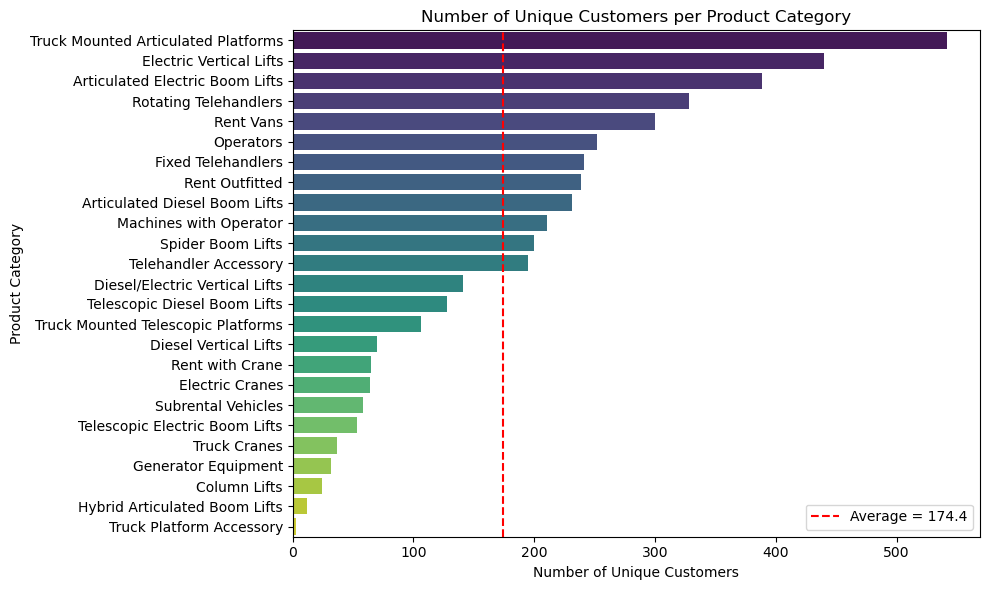

In [67]:
## Recognizing the number of unique customers 
unique_customers = df["Customer ID"].nunique()
print(f"Number of unique customers: {unique_customers}")

# visualization of the N. of unique customers of each product category
import matplotlib.pyplot as plt
import seaborn as sns

unique_by_product = df.groupby("Product Category")["Customer ID"].nunique().sort_values(ascending=False) # Count unique customers per product category

avg_customers = unique_by_product.mean()  # Calculate the average

plt.figure(figsize=(10, 6))  # Plotting
sns.barplot(x=unique_by_product.values, y=unique_by_product.index, palette="viridis")

plt.axvline(avg_customers, color='red', linestyle='--', label=f'Average = {avg_customers:.1f}') # Adding average line

# Final touches
plt.title("Number of Unique Customers per Product Category")
plt.xlabel("Number of Unique Customers")
plt.ylabel("Product Category")
plt.legend()
plt.tight_layout()
plt.show()

This chart reveals the number of unique customers engaging with each product category. Categories such as Autocarrate and Semoventi Girevoli stand out with the highest customer reach, clearly positioning them as core offerings in the portfolio. The red vertical line represents the average number of customers per category, helping to distinguish standout performers from niche or under-utilized product lines.

Insight: Products that exceed the average customer count are likely to be broadly applicable and more scalable. These products should be prioritized for marketing campaigns, bundling strategies, and availability planning, especially during peak demand periods.

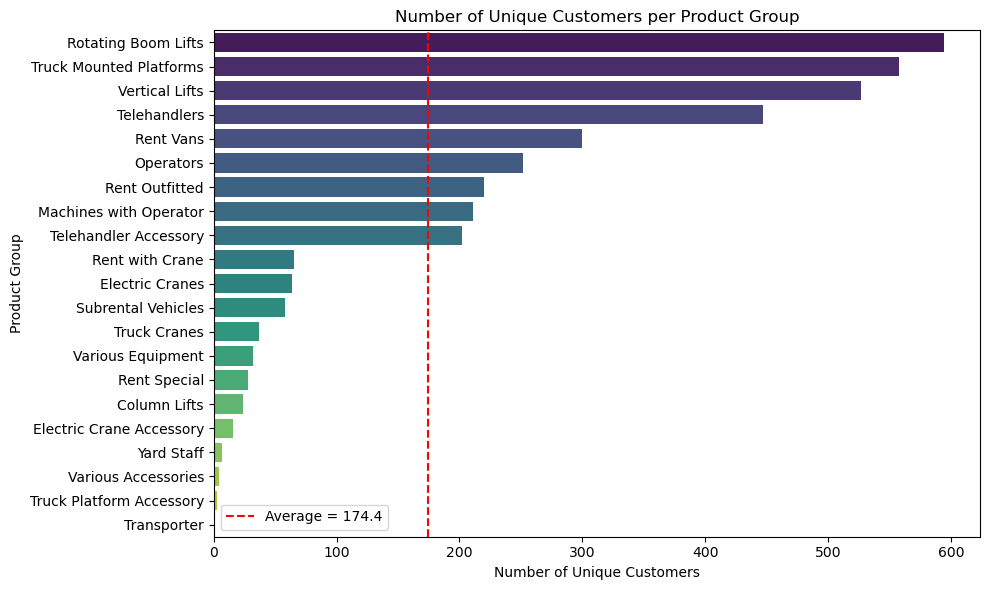

In [68]:
## Analysis of Customers by Product Group
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate unique customers per Product Group
unique_by_product_group = df.groupby("Product Group")["Customer ID"].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=unique_by_product_group.values,
    y=unique_by_product_group.index,
    palette="viridis"
)
plt.axvline(avg_customers, color='red', linestyle='--', label=f'Average = {avg_customers:.1f}')
plt.title("Number of Unique Customers per Product Group")
plt.xlabel("Number of Unique Customers")
plt.ylabel("Product Group")
plt.legend()
plt.tight_layout()
plt.show()


At a more broad level, this chart shows how customer distribution varies across specific product groups. It complements the category-level view by uncovering which precise groups drive the broadest reach.

Insight: Product groups with high customer diversity suggest wide market applicability, making them ideal for upsell and cross-sell initiatives. Groups with lower customer reach may benefit from niche-focused marketing or improved onboarding for first-time users.

Repeat customers: 984
One-time customers: 628
Average number of transactions per customer: 12.69727047146402


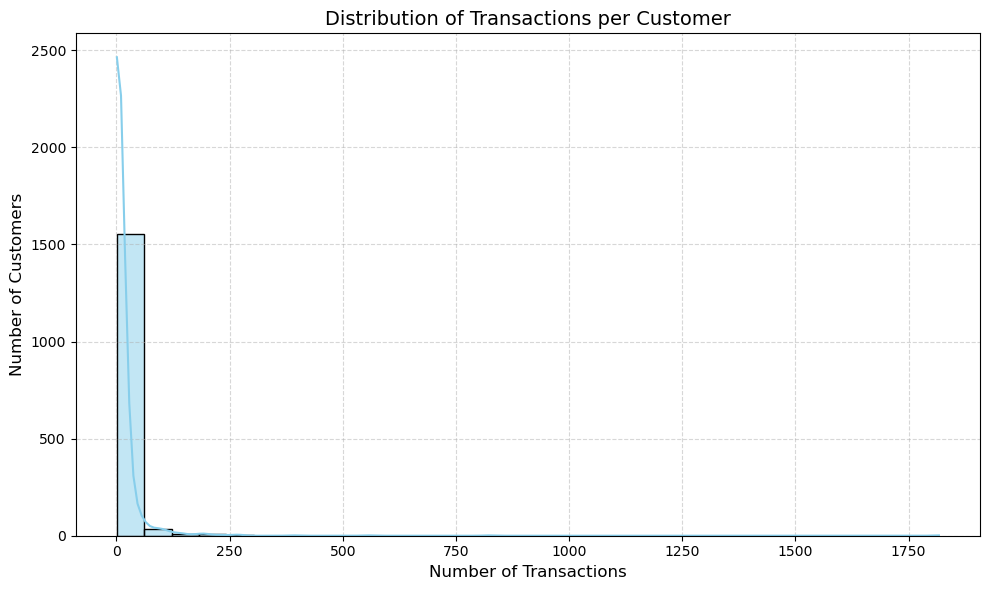

In [69]:
## Distribution of Transaction Frequency per Customer and customer analysis
# Group by "Customer ID" and count unique "Order ID" (contracts)
customer_transaction_counts = df.groupby("Customer ID")["Order ID"].nunique()

# n. of customers having one transaction and more
repeat_customers = (customer_transaction_counts > 1).sum()
one_time_customers = (customer_transaction_counts == 1).sum()

print(f"Repeat customers: {repeat_customers}")
print(f"One-time customers: {one_time_customers}")

# Calculate the average number of transactions per customer
average_transactions = customer_transaction_counts.mean()
print("Average number of transactions per customer:", average_transactions)

# Plot the distribution of transactions per customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_transaction_counts, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Transactions per Customer", fontsize=14)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This histogram illustrates the distribution of how many orders each customer has made. A significant portion are one-time users, indicating either project-based, ad-hoc demand or lack of re-engagement.

Insight: The high volume of one-time customers is a critical business risk. Implementing automated follow-ups, loyalty programs, or usage-based incentives could increase customer retention and repeat usage—especially for first-time renters.

In [70]:
# checking if each Order ID correspond to a unique product category
# For each unique "Order ID", calculate the number of unique "Product Category" values.
order_mapping = df.groupby('Order ID')['Product Category'].nunique().reset_index(name='Unique_Product_Categories')

# Check Uniqueness
# Orders where the mapping is not unique (i.e., more than one Product Category)
non_unique = order_mapping[order_mapping['Unique_Product_Categories'] > 1]

# Summary statistics: count of orders with a unique mapping vs non-unique.
total_orders = order_mapping.shape[0]
unique_orders = order_mapping[order_mapping['Unique_Product_Categories'] == 1].shape[0]
non_unique_orders = non_unique.shape[0]

print(f"Order ID' count: {total_orders}")
print(f"Orders with a unique 'Product Category': {unique_orders}")
print(f"Orders with more than one 'Product Category': {non_unique_orders}")

if non_unique_orders > 0:
    print("\nOrders with non-unique mappings:")
    print(non_unique)

Order ID' count: 20464
Orders with a unique 'Product Category': 17648
Orders with more than one 'Product Category': 2734

Orders with non-unique mappings:
              Order ID  Unique_Product_Categories
149    2020/ON  007622                          2
210    2020/ON  008822                          2
306    2020/ON  009862                          2
307    2020/ON  009863                          2
308    2020/ON  009877                          2
...                ...                        ...
20440  2024/ON  009251                          2
20453  2024/ON  009323                          2
20455  2024/ON  009339                          2
20459  2024/ON  009378                          2
20460  2024/ON  009384                          2

[2734 rows x 2 columns]


In [71]:
# Find Order IDs with >1 product category, excluding those where the only categories are 'macchina_operatore' and 'operatori_'
exclude_set = {"macchina_operatore", "operatori_"}

# Get Order IDs with more than one unique product category
order_ids_with_multiple_categories = order_mapping.loc[
    order_mapping["Unique_Product_Categories"] > 1, "Order ID"
]

# For each multi-category Order ID, get the set of categories
order_cat_map = (
    df[df["Order ID"].isin(order_ids_with_multiple_categories)]
    .groupby("Order ID")["Product Category"]
    .apply(lambda cats: set(cats.dropna()))
)

# Keep only those where, after removing the exclude_set, there is still more than one category left
filtered_order_ids = [
    oid for oid, cats in order_cat_map.items()
    if len(cats - exclude_set) > 1
]

print("Order IDs with >1 product category (excluding only 'macchina_operatore' and 'operatori_'):")
print(filtered_order_ids)

Order IDs with >1 product category (excluding only 'macchina_operatore' and 'operatori_'):
['2020/ON  007622', '2020/ON  008822', '2020/ON  009862', '2020/ON  009863', '2020/ON  009877', '2020/ON  009926', '2020/ON  009927', '2020/ON  009928', '2020/ON  009988', '2020/ON  009990', '2020/ON  010068', '2020/ON  010081', '2020/ON  010082', '2020/ON  010094', '2021/ON  000055', '2021/ON  000112', '2021/ON  000135', '2021/ON  000168', '2021/ON  000201', '2021/ON  000215', '2021/ON  000229', '2021/ON  000233', '2021/ON  000249', '2021/ON  000253', '2021/ON  000276', '2021/ON  000279', '2021/ON  000280', '2021/ON  000291', '2021/ON  000295', '2021/ON  000336', '2021/ON  000361', '2021/ON  000412', '2021/ON  000458', '2021/ON  000477', '2021/ON  000482', '2021/ON  000524', '2021/ON  000530', '2021/ON  000561', '2021/ON  000562', '2021/ON  000580', '2021/ON  000594', '2021/ON  000605', '2021/ON  000682', '2021/ON  000686', '2021/ON  000687', '2021/ON  000712', '2021/ON  000719', '2021/ON  00076

In [72]:
# Show the product categories in the given order_id
order_id = '2023/ON  008795'
categories_in_order = df[df["Order ID"] == order_id]["Product Category"].unique()
print(f"Product categories in Order ID '{order_id}': {categories_in_order}")

Product categories in Order ID '2023/ON  008795': ['Spider Boom Lifts' 'Rent Outfitted' nan]


To determine the actual number of contracts that each product category represents, we first made sure that each Order ID mapped to a single Product Category; otherwise, a single contract could erroneously inflate counts across several categories and the amount paid per Order ID wouldn’t correspond to only one product. We discovered 18,205 orders corresponded to unique categories while 2,052 orders referred to multiple categories, most frequently combining "Machines with Operator" with "Operators." Upon closer inspection, it was discovered that when these two occur together, the total amount paid is listed under "Machines with Operator," indicating that they work as a bundled service. Since this overlap represents a purposeful pairing and signifies a rather close type of service and as the amount for "Operators" is zero or null, in these cases we simply counted the instances of each Order ID in both categories. With this method, we can precisely count the number of distinct contracts for each product. A combination of "Spider Boom Lifts" and "Rent Outfitted" was the only other order with this circumstance after this. Among all the orders with only one product category listed in their Order ID, this little number is insignificant (only one order). Because of this, it appeared that calculating the number of unique contracts for each Product Category (PC) would indicate how frequently each was requested.

Total unique contracts: 20464
Total unique Product Categories: 25
          Order ID  Contract Value
0  2014/ON  004777          4400.0
1  2016/ON  000962         12350.0
2  2016/ON  008839          3750.0
3  2016/ON  009439         34650.0
4  2016/ON  009795         24200.0
                       Product Category  Contract Frequency
22  Truck Mounted Articulated Platforms                4153
6               Electric Vertical Lifts                3255
1       Articulated Electric Boom Lifts                2968
11                            Operators                2056
15                Rotating Telehandlers                2002


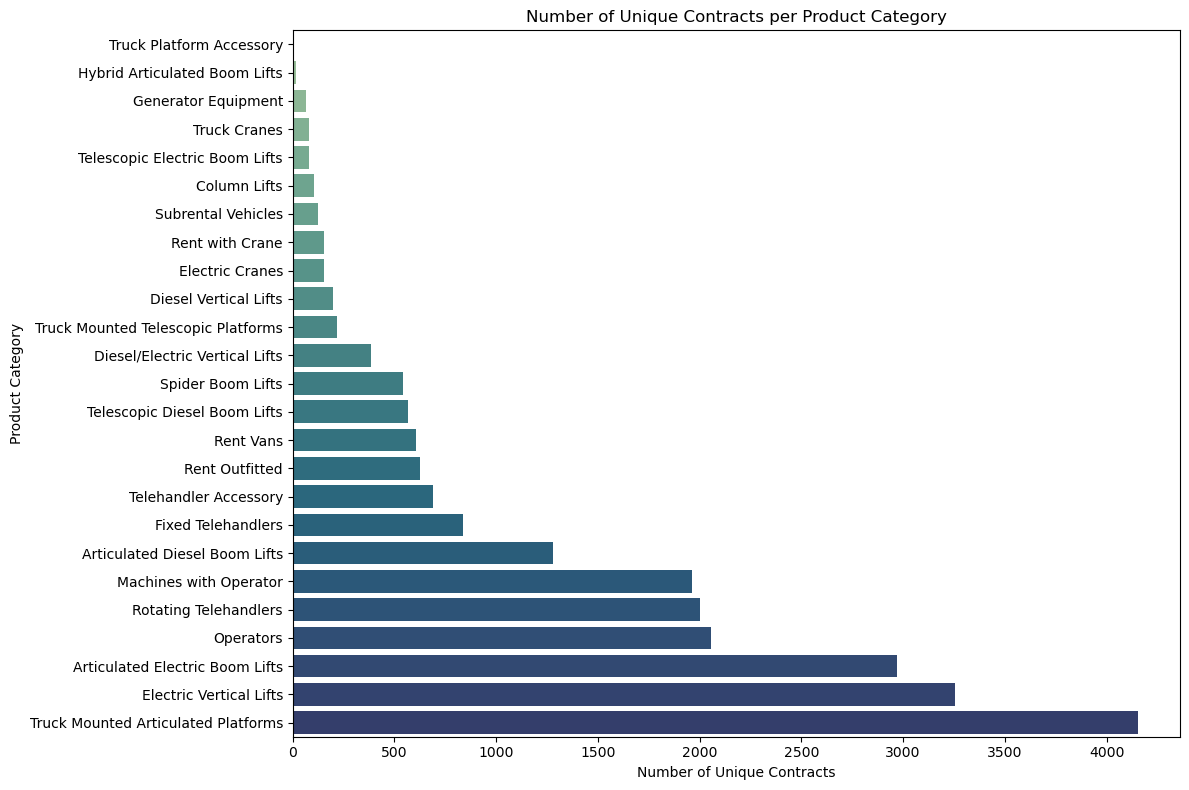

In [73]:
## General Analysis - Analysis of Products
# Number of unique contracts
unique_contracts = df["Order ID"].nunique()
print(f"Total unique contracts: {unique_contracts}")

# Number of unique Product Categories
unique_Product_Categories = df["Product Category"].nunique()
print(f"Total unique Product Categories: {unique_Product_Categories}")

# calculating the value of each contract 
contract_values = df.groupby("Order ID")["Amount"].sum().reset_index(name="Contract Value")
print(contract_values.head()) # Show sample

# the frequency of contract (purchase) for each product category
contract_freq = df.groupby("Product Category")["Order ID"].nunique().reset_index()
contract_freq = contract_freq.rename(columns={"Order ID": "Contract Frequency"})
contract_freq = contract_freq.sort_values(by="Contract Frequency", ascending=False)
print(contract_freq.head())

plt.figure(figsize=(12, 8)) # visualization
sns.barplot(data=contract_freq.sort_values("Contract Frequency", ascending=True),
            y="Product Category", x="Contract Frequency", palette="crest")

plt.title("Number of Unique Contracts per Product Category")
plt.xlabel("Number of Unique Contracts")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


In total, there are 20,335 unique contracts across 22 product categories (excluding accessories). The top three product categories by contract volume—Truck Mounted Articulated Platforms, Electric Vertical Lifts, and Articulated Electric Boom Lifts—also have the highest number of unique customers, suggesting both scale and reach. A second tier of products, like Operators and Rotating Telehandlers, shows strong but less dominant demand, averaging 2,000–2,300 contracts. Meanwhile, some products like Silver services (e.g., Rent Outfitted, Rent Vans) do not rank high in contract volume but still attract many unique customers. This indicates they are used less frequently but appeal to a broad customer base—possibly for long-term or occasional needs, which is explored in later sections.

Insight
The strong alignment between contract volume and unique customer count in top product categories—such as Truck Mounted Articulated Platforms and Electric Vertical Lifts—confirms their role as core, high-frequency offerings. These categories should form the backbone of bundling strategies and be prioritized for availability and fast turnaround. In contrast, Silver services (e.g., Rent Outfitted, Rent Vans) show low contract volume but wide customer reach, indicating low-frequency yet potentially high-value or long-duration use. These offerings are ideal candidates for renewal campaigns, value-based pricing, and inclusion in long-term or project-specific bundles—strategies that drive engagement without relying on repeat short-term usage.


Total unique contracts: 20464
Total unique Product Group: 21
          Order ID  Contract Value
0  2014/ON  004777          4400.0
1  2016/ON  000962         12350.0
2  2016/ON  008839          3750.0
3  2016/ON  009439         34650.0
4  2016/ON  009795         24200.0
              Product Group  Contract Frequency
9       Rotating Boom Lifts                5457
15  Truck Mounted Platforms                4396
19           Vertical Lifts                3898
12             Telehandlers                2838
4                 Operators                2056


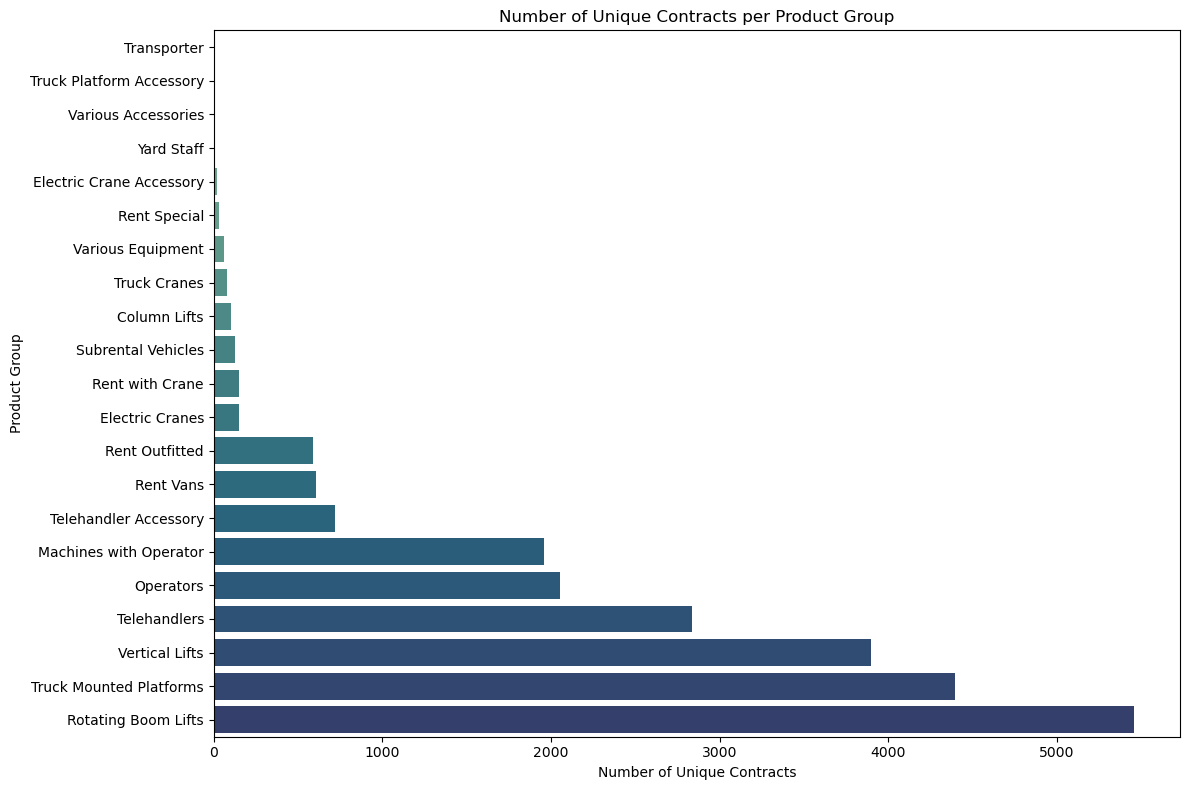

In [74]:
# Number of unique contracts
unique_contracts = df["Order ID"].nunique()
print(f"Total unique contracts: {unique_contracts}")

# Number of unique Product Categories
unique_Product_Categories = df["Product Group"].nunique()
print(f"Total unique Product Group: {unique_Product_Categories}")

# calculating the value of each contract 
contract_values = df.groupby("Order ID")["Amount"].sum().reset_index(name="Contract Value")
print(contract_values.head()) # Show sample

# the frequency of contract (purchase) for each product category
contract_freq = df.groupby("Product Group")["Order ID"].nunique().reset_index()
contract_freq = contract_freq.rename(columns={"Order ID": "Contract Frequency"})
contract_freq = contract_freq.sort_values(by="Contract Frequency", ascending=False)
print(contract_freq.head())

plt.figure(figsize=(12, 8)) # visualization
sns.barplot(data=contract_freq.sort_values("Contract Frequency", ascending=True),
            y="Product Group", x="Contract Frequency", palette="crest")

plt.title("Number of Unique Contracts per Product Group")
plt.xlabel("Number of Unique Contracts")
plt.ylabel("Product Group")
plt.tight_layout()
plt.show()


                       Product Category  Distinct_Machine_Count
24             Truck Platform Accessory                       2
9         Hybrid Articulated Boom Lifts                       2
14                      Rent with Crane                       2
20       Telescopic Electric Boom Lifts                       3
21                         Truck Cranes                       4
8                   Generator Equipment                       4
23   Truck Mounted Telescopic Platforms                       4
5                       Electric Cranes                       6
10               Machines with Operator                       6
11                            Operators                       7
3                 Diesel Vertical Lifts                      13
16                    Spider Boom Lifts                      14
4        Diesel/Electric Vertical Lifts                      15
19         Telescopic Diesel Boom Lifts                      25
22  Truck Mounted Articulated Platforms 

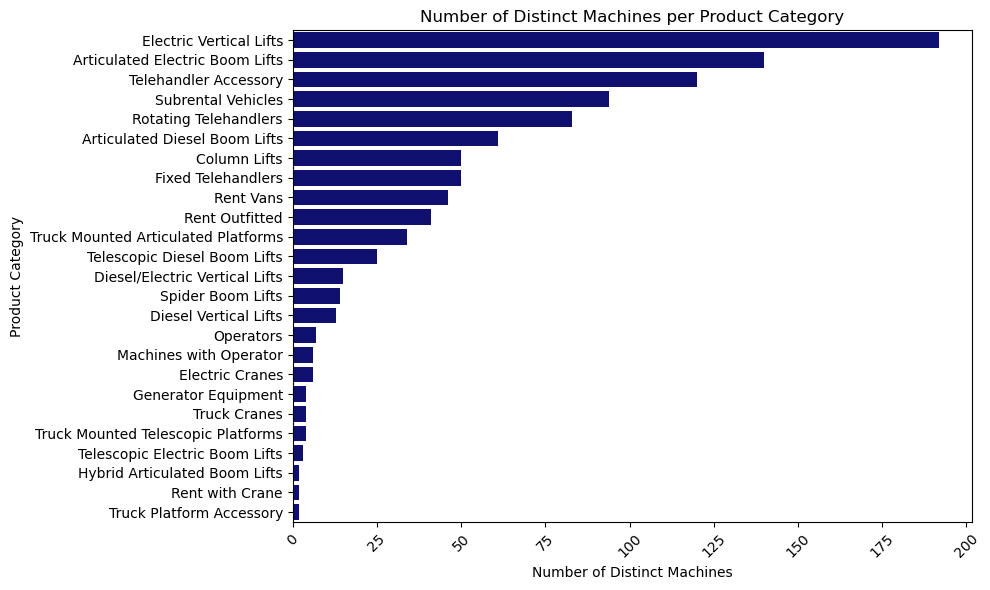

In [75]:
# Count the unique number of Machine IDs per Product Category
distinct_machines_per_category = df.groupby("Product Category")["Machine ID"].nunique().reset_index()
distinct_machines_per_category = distinct_machines_per_category.rename(columns={"Machine ID": "Distinct_Machine_Count"})
print(distinct_machines_per_category.sort_values("Distinct_Machine_Count", ascending=True))

# visualization of the number of distinct machines per product category
plt.figure(figsize=(10, 6))
sns.barplot(
    data=distinct_machines_per_category.sort_values("Distinct_Machine_Count", ascending=False),
    y="Product Category",
    x="Distinct_Machine_Count",
    color="navy"
)
plt.title("Number of Distinct Machines per Product Category")
plt.xlabel("Number of Distinct Machines")
plt.ylabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PRODUCT QUESTION:  
Is fleet size aligned with product demand?
Should the company invest in expanding certain product fleets, or can demand be met through better utilization of existing assets?

DATA FINDING: 
Electric Vertical Lifts and Articulated Electric Boom Lifts show both high demand and large fleets, indicating intentional reinvestment aligned with market needs.Truck Mounted Articulated Platforms, despite being the most frequently rented product, operate with a relatively small fleet (~37 machines). This suggests that short-term contracts and high turnover rates allow a small number of units to serve large customer volumes. The Operators category serves over 2,000 customers with only five machines, implying ultra-short engagements and efficient redeployment cycles. Silver services (e.g., Rent Vans) maintain a mid-range fleet size while appealing to a broad customer base—likely due to longer-term or project-based usage.

PRODUCT INSIGHT:    
Where demand and fleet size are both high (e.g., Electric Vertical Lifts), ongoing investment is clearly justified. However, in cases like Truck Mounted Articulated Platforms, operational efficiency—not scale—drives performance. These should be optimized through tight scheduling, dynamic dispatching, and idle time reduction, rather than fleet expansion.

This analysis helps both product and operations teams make informed decisions:
- Invest in categories where scale drives value
- Optimize where turnover efficiency is already high

In [76]:
# Create Usage Duration
df["Contract Duration (days)"] = (df["End of rental"] - df["Start of rental"]).dt.days

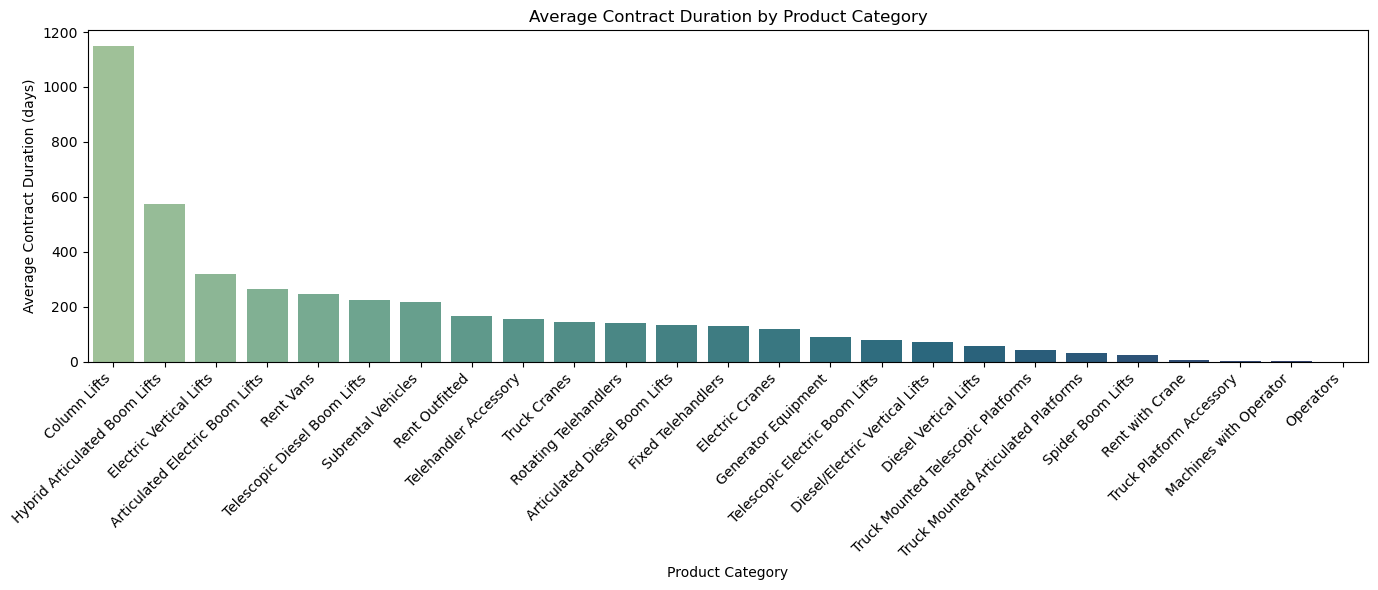

In [77]:
# Calculate average contract duration per product category
import seaborn as sns
import matplotlib.pyplot as plt

avg_contract_duration = (
    df.groupby("Product Category")["Contract Duration (days)"]
    .mean()
    .reset_index()
    .sort_values("Contract Duration (days)", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_contract_duration,
    x="Product Category",
    y="Contract Duration (days)",
    palette="crest"
)
plt.ylabel("Average Contract Duration (days)")
plt.title("Average Contract Duration by Product Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

PRODUCT QUESTION:   
How do average contract durations influence fleet strategy and ROI across product categories?
Which products justify long-term fleet investment, and which deliver value through turnover efficiency?

DATA FINDING: 
- Column Lifts average over 1,100 days per contract (the longest observed), yet maintain low contract volume, raising ROI concerns for a fleet of ~50 units.
- Hybrid Articulated Boom Lifts also show very long durations (~580 days) but serve a niche segment with only two units.
- Electric Vertical Lifts and Articulated Electric Boom Lifts strike a strong balance—offering mid-to-long durations (260–320 days), high contract volume, and alignment with semi-annual to annual projects.
- Rent Vans and Rent Outfitted average 150–230 days, serving mid-term deployments.
- Operators and Machines with Operator have short durations (just a few days) but very high usage volume, enabling broad coverage with minimal fleet size.
- Truck Mounted Articulated Platforms, despite having the highest rental frequency, maintain short contract durations, making them ideal for quick dispatch and fast turnover with a compact fleet (~37 units).

PRODUCT INSIGHT:    
- Each product line supports a unique time-based use case—from multi-year strategic deployments to on-demand daily hires.
- High-duration, low-frequency products (e.g., Column Lifts) should undergo ROI audits to ensure fleet size matches real utilization.
- High-volume, short-duration categories (e.g., Truck Mounted Articulated Platforms) excel through turnover optimization rather than fleet expansion—invest in maintenance speed, real-time availability, and scheduling tools.
- Mid-tier winners (e.g., Electric Vertical Lifts) combine durability with popularity, making them ideal candidates for long-term contract bundles, subscription models, or reinforced fleet investment.



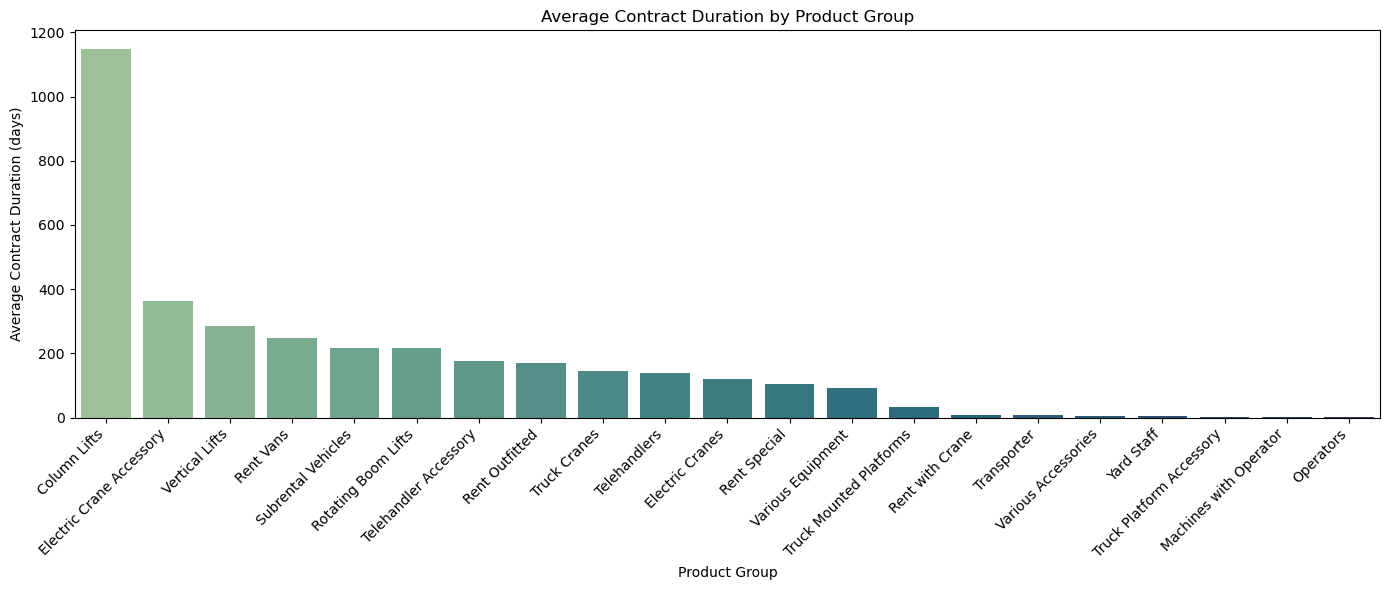

In [78]:
# Calculate average contract duration per product group (MORE GENERAL PERSPECTIVE)
avg_contract_duration = (
    df.groupby("Product Group")["Contract Duration (days)"]
    .mean()
    .reset_index()
    .sort_values("Contract Duration (days)", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_contract_duration,
    x="Product Group",
    y="Contract Duration (days)",
    palette="crest"
)
plt.ylabel("Average Contract Duration (days)")
plt.title("Average Contract Duration by Product Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:
# Calculate the price per day for each contract, excluding Saturdays and Sundays

# Function to count business days (Mon-Fri) between two dates (inclusive of start, exclusive of end)
def count_business_days(start, end):
    if pd.isnull(start) or pd.isnull(end):
        return np.nan
    # np.busday_count excludes the end date, so add 1 day to include the last day if needed
    return np.busday_count(start.date(), (end + pd.Timedelta(days=1)).date())

# Calculate business days for each row
df["Business_Days"] = df.apply(
    lambda row: count_business_days(row["Start of rental"], row["End of rental"]),
    axis=1
)

# Calculate price per business day (exclude weekends)
df["Price_per_business_day"] = np.where(
    (df["Amount"].notnull()) & (df["Business_Days"] > 0),
    df["Amount"] / df["Business_Days"],
    np.nan
)

# Display a sample of the new columns
print(df[["Order ID", "Product Category", "Amount", "Contract Duration (days)", "Business_Days", "Price_per_business_day"]].head(10))

          Order ID Product Category   Amount  Contract Duration (days)  \
0  2020/ON  003184   Rent Outfitted  1426.00                       302   
1  2020/ON  007836   Rent Outfitted  1550.00                       111   
2  2020/ON  001385        Rent Vans   600.00                       701   
3  2020/ON  008522        Rent Vans   950.00                       219   
4  2020/ON  008326        Rent Vans   899.00                        73   
5  2020/ON  008031   Rent Outfitted  1350.00                       893   
6  2020/ON  009323        Rent Vans  1240.00                        80   
7  2020/ON  000087   Rent Outfitted   850.00                       386   
8  2019/ON  010621   Rent Outfitted  1787.77                       986   
9  2020/ON  000528   Rent Outfitted  1643.00                       402   

   Business_Days  Price_per_business_day  
0            217                6.571429  
1             80               19.375000  
2            502                1.195219  
3            

In [80]:
# Calculate average price_per_business_day, business_days, and contract duration for each product category
avg_stats = (
    df.groupby("Product Category")
    .agg(
        avg_price_per_business_day=("Price_per_business_day", "mean"),
        avg_business_days=("Business_Days", "mean"),
        avg_contract_duration=("Contract Duration (days)", "mean")
    )
    .reset_index()
    .sort_values("avg_price_per_business_day", ascending=False)
)

print(avg_stats)

                       Product Category  avg_price_per_business_day  \
10               Machines with Operator                  877.990626   
5                       Electric Cranes                  144.903703   
23   Truck Mounted Telescopic Platforms                  137.645854   
14                      Rent with Crane                  123.480318   
16                    Spider Boom Lifts                  115.570751   
22  Truck Mounted Articulated Platforms                  113.255473   
21                         Truck Cranes                   98.111672   
17                   Subrental Vehicles                   89.075068   
15                Rotating Telehandlers                   62.741775   
0         Articulated Diesel Boom Lifts                   48.694842   
19         Telescopic Diesel Boom Lifts                   47.821702   
20       Telescopic Electric Boom Lifts                   42.403910   
12                       Rent Outfitted                   42.310013   
13    

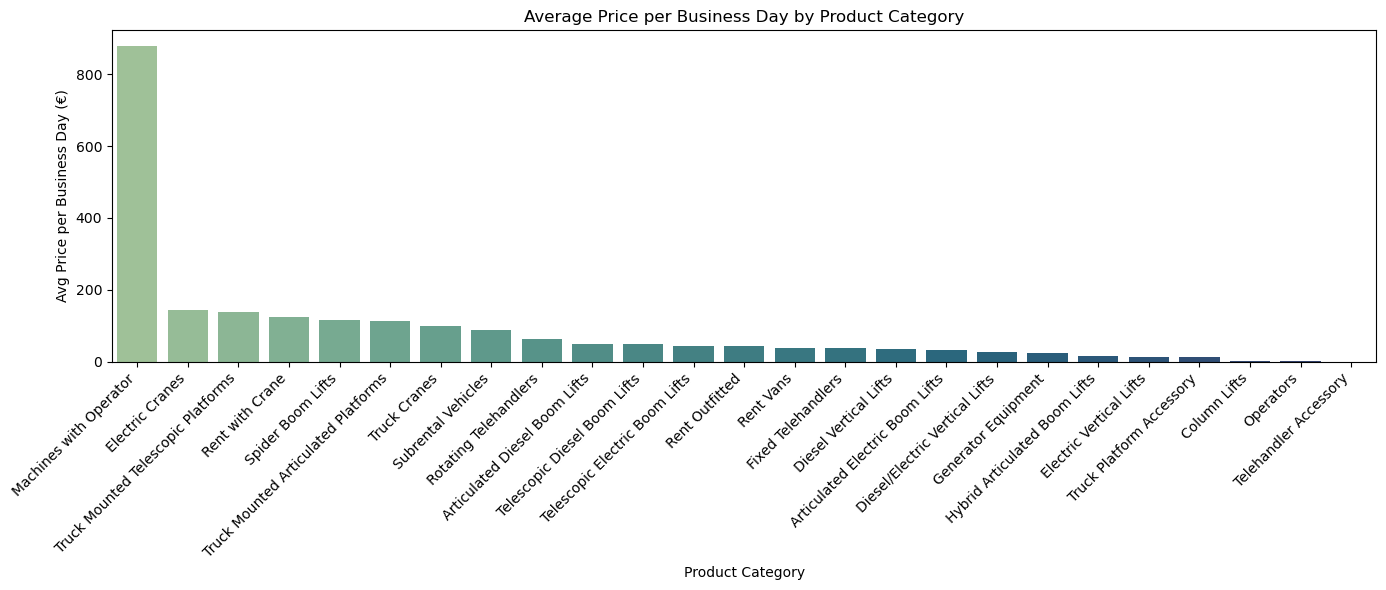

In [81]:
# Visualize only the average price per business day for each product category

plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_stats.sort_values("avg_price_per_business_day", ascending=False),
    x="Product Category",
    y="avg_price_per_business_day",
    palette="crest"
)
plt.ylabel("Avg Price per Business Day (€)")
plt.title("Average Price per Business Day by Product Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


PRODUCT QUESTION:   
Which products generate the most revenue per day, and how should pricing and positioning reflect their usage patterns?
Should high-yield, low-frequency machines be treated differently from low-yield, high-volume products?

DATA FINDING: 
- Average daily price was calculated by dividing each contract’s value by the number of business days between rental start and end.
- Machines with Operator top the chart at €900/day, driven by bundled labor and machine fees.
- Other high-yielding categories—including Electric Cranes, Truck Mounted Telescopic Platforms, Rent with Crane, and Spider Boom Lifts—range between €120–150/day.
- None of these top 5 most expensive categories appear among the most frequently rented products, indicating low-frequency, high-margin positioning.

PRODUCT INSIGHT:  
Premium-priced products like Machines with Operator and Electric Cranes should be positioned as specialized, high-value offerings—ideal for urgent, complex, or high-budget projects. Revenue growth for these assets comes not from volume, but from targeted deployment, value-added services, and premium availability guarantees. In contrast, lower-priced, high-turnover products (e.g., Truck Mounted Articulated Platforms) remain critical to steady, recurring revenue and should be optimized for availability and fleet efficiency. This dual strategy ensures both profitability and operational resilience across customer types and project needs.

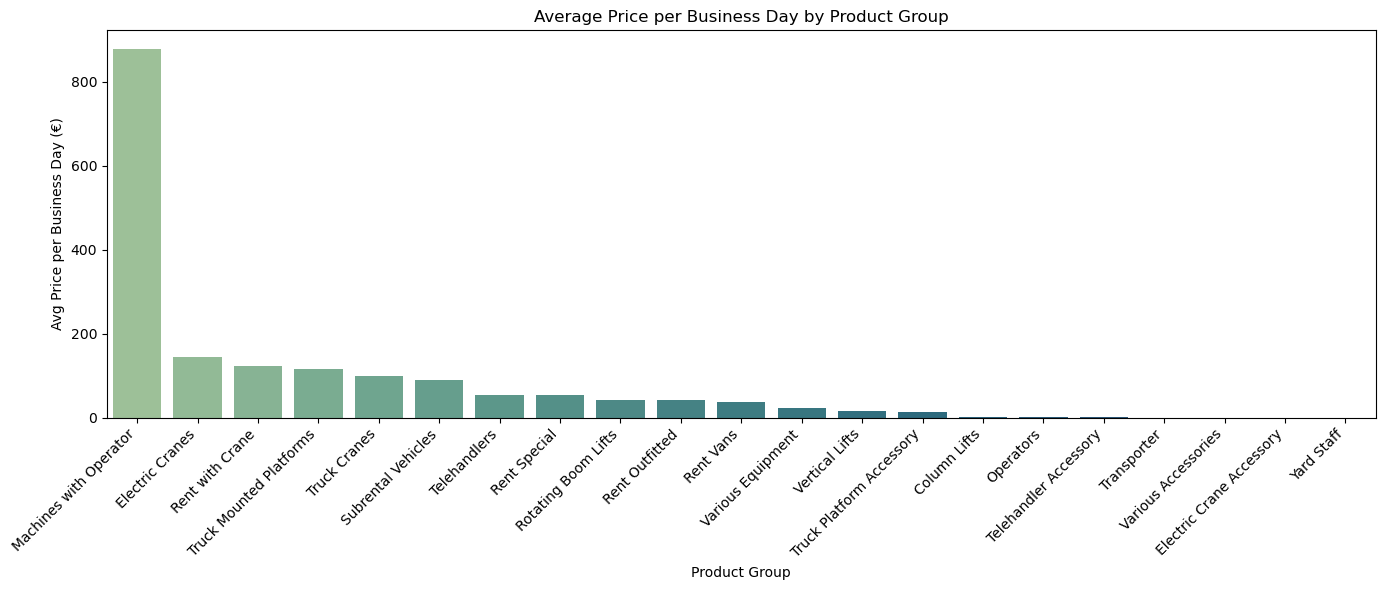

In [82]:
# Calculate average price per business day for each Product Group
avg_price_per_group = (
    df.groupby("Product Group")["Price_per_business_day"]
    .mean()
    .reset_index()
    .sort_values("Price_per_business_day", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_price_per_group,
    x="Product Group",
    y="Price_per_business_day",
    palette="crest"
)
plt.ylabel("Avg Price per Business Day (€)")
plt.title("Average Price per Business Day by Product Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


CONCLUDING INSIGHTS: 
- Truck Mounted Articulated Platforms (Autocarrate Articolate):
Nudge a portion of short-term users toward medium/long-term rentals to increase revenue per unit without needing to expand the fleet.

- Machines with Operator (Macchina Operatore):
Assess the opportunity to scale through part-time or freelance operators, enabling more high-yield, short-term contracts without permanent labor costs.

- Electric Vertical & Articulated Boom Lifts (Semverticali & Semgirevoli Ele):
These are already well-utilized; focus on price-tiering, long-term service bundles, or premium SLA options to boost margin.

- Hybrid Articulated Units (Hyb):
Consider selective fleet expansion only if long-term demand patterns confirm sustainable ROI—avoid overstocking niche assets.

- Rotating Boom Lifts (Semoventi Girevoli):
A versatile candidate for tiered rental plans—short, medium, and long durations—supported by flexible pricing and add-on services to deepen engagement.

- Column Lifts (Elevatori Colonna):
Reposition existing units from long-term, low-yield rentals to mid-range contracts at higher daily rates, enhancing cash flow without new capital investment.

Seasonality Analysis

ANALYSIS QUESTION:  
In the Seasonality Analysis we aim to know: How do rental duration patterns (daily, monthly, annual) vary across product categories throughout the year, and how can this inform fleet planning or marketing timing?

To uncover seasonal demand patterns, contracts were grouped by duration into daily (≤30 days), monthly (31–364), and annual (≥365) types.
Each rental was labeled and analyzed across product categories to reveal how rental length preferences vary over time.
This classification highlights seasonal trends and product-specific usage behaviors tied to project timing and industry cycles.

In [83]:
# Categorize each Order ID based on contract duration
def categorize_rental(duration_days):
    if duration_days < 30:
        return "Daily"
    elif duration_days < 365:
        return "Monthly"
    else:
        return "Annual"

# Calculate contract duration for each Order ID (if not already present)
# Here, we use the already computed "Contract Duration (days)" column
order_duration = df.groupby("Order ID")["Contract Duration (days)"].max().reset_index()

# Apply categorization
order_duration["Rental_Type"] = order_duration["Contract Duration (days)"].apply(categorize_rental)

# Merge back to main DataFrame
df = df.merge(order_duration[["Order ID", "Rental_Type"]], on="Order ID", how="left")

# Show a sample of the result
print(df[["Order ID", "Contract Duration (days)", "Rental_Type"]].head(10))

          Order ID  Contract Duration (days) Rental_Type
0  2020/ON  003184                       302     Monthly
1  2020/ON  007836                       111     Monthly
2  2020/ON  001385                       701      Annual
3  2020/ON  008522                       219     Monthly
4  2020/ON  008326                        73     Monthly
5  2020/ON  008031                       893      Annual
6  2020/ON  009323                        80     Monthly
7  2020/ON  000087                       386      Annual
8  2019/ON  010621                       986      Annual
9  2020/ON  000528                       402      Annual


In [84]:
# Remove annual rental orders from the dataset
df_no_annual = df[df["Rental_Type"] != "Annual"].copy()

# Quick check: show the distribution of Rental_Type in the new dataset
print(df_no_annual["Rental_Type"].value_counts())

Daily      22324
Monthly    13355
Name: Rental_Type, dtype: int64


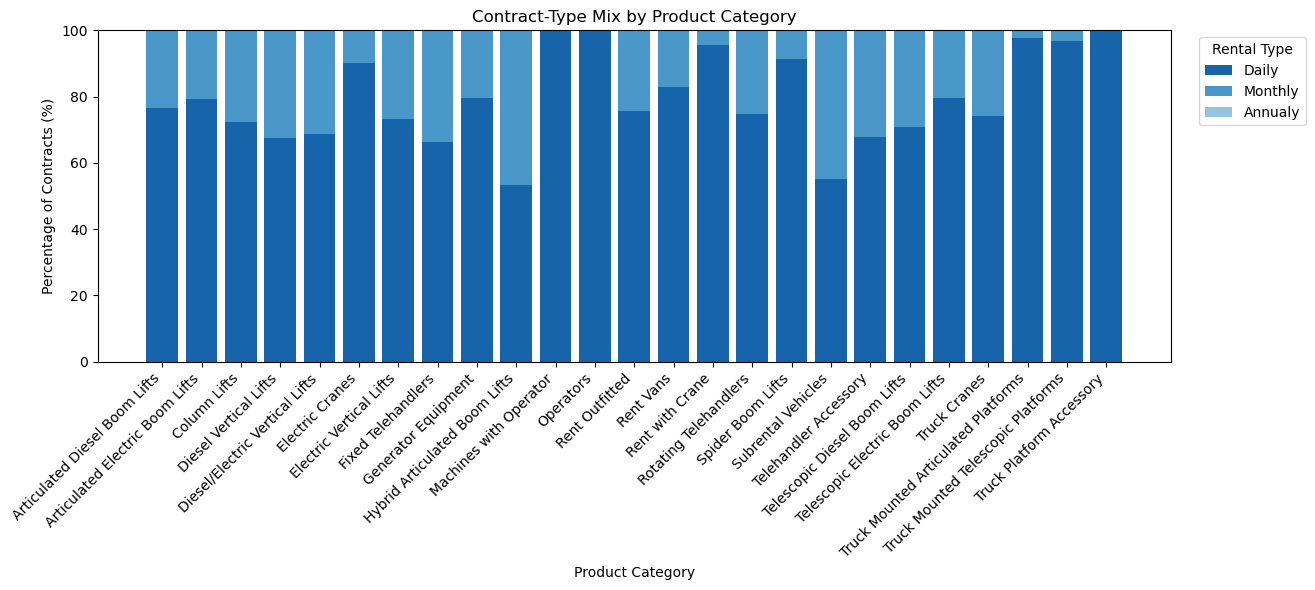

In [85]:
# Calculate the contract-type mix by Product Category as percentages
pivot = (
    df.groupby(['Product Category', 'Rental_Type'])['Order ID']
    .nunique()
    .unstack(fill_value=0)
)

# Reindex columns to ensure correct order
pivot = pivot.reindex(columns=['Daily', 'Monthly', 'Annualy'])

# Convert counts to percentages
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Generate three shades from the Blues colormap
cmap = plt.cm.Blues
navy_shades = [cmap(0.8), cmap(0.6), cmap(0.4)]  # darkest for Daily, then Monthly, then Annualy

fig, ax = plt.subplots(figsize=(14, 6))
bottom = pd.Series(0, index=pivot_pct.index)

for shade, contract_type in zip(navy_shades, pivot_pct.columns):
    ax.bar(
        pivot_pct.index,
        pivot_pct[contract_type],
        bottom=bottom,
        label=contract_type,
        color=shade,
    )
    bottom += pivot_pct[contract_type]

ax.set_ylim(0, 100)
ax.set_ylabel("Percentage of Contracts (%)")
ax.set_xlabel("Product Category")
ax.set_title("Contract‐Type Mix by Product Category")

plt.xticks(rotation=45, ha="right")
plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on the right for the legend

# Move legend outside the plot
ax.legend(title="Rental Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()


ANALYSIS QUESTION:   
How do contract duration preferences differ across product categories, and what does that imply for rental strategy?

DATA FINDING:  
- Daily rentals dominate in most categories (70–90%), particularly for high-turnover products like Truck Mounted Platforms and Electric Vertical Lifts.
- Column Lifts are a notable outlier, with ~44% of contracts being annual, reflecting long-term, project-based needs.
- Mid-tier categories (e.g., Rent Vans, Telescopic Boom Lifts) present a more balanced profile, combining short-term flexibility with monthly project alignment.

INSIGHT:  
High-frequency assets thrive on daily contracts, requiring fast availability, optimized turnover, and agile maintenance scheduling. Specialized or infrastructure-oriented products support annual commitments, offering predictable revenue and operational stability. To maximize value, the company should tailor rental strategies and fleet allocation by category—scaling availability for short-term demand, and reinforcing support for long-term lease models.

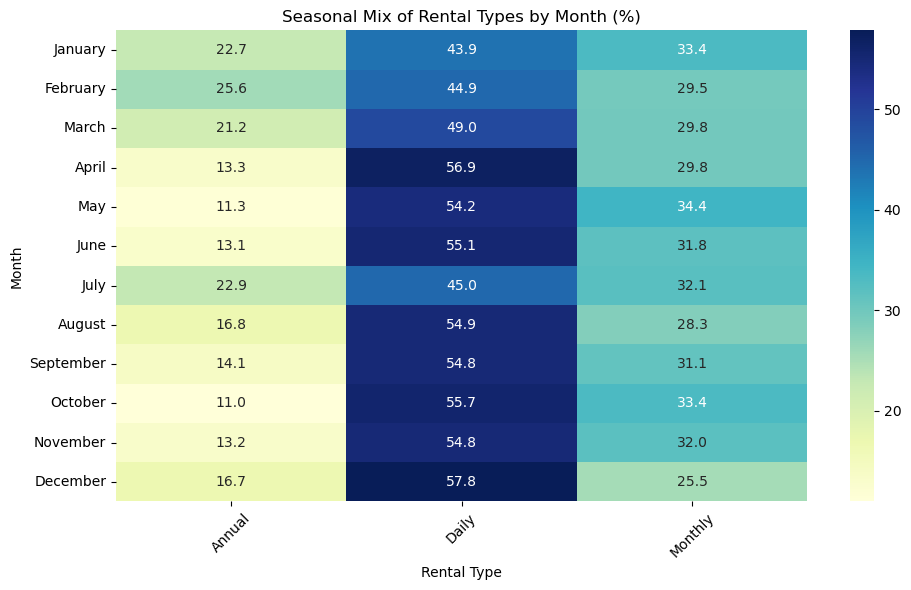

In [86]:
# Seasonal Mix of Rental Types by Month
# 1) Prepare the data
df['Start of rental'] = pd.to_datetime(df['Start of rental'])
df['Month'] = df['Start of rental'].dt.month_name()

# 2) Create pivot of counts
heat_data = df.groupby(['Month', 'Rental_Type']).size().unstack(fill_value=0)

# 3) Reindex rows to calendar order
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
heat_data = heat_data.reindex(months_order)

# 4) Convert counts to percentages
heat_pct = heat_data.div(heat_data.sum(axis=1), axis=0) * 100

# 5) Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heat_pct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Seasonal Mix of Rental Types by Month (%)")
plt.xlabel("Rental Type")
plt.ylabel("Month")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


ANALYSIS QUESTION:  
How does the mix of daily, monthly, and annual contracts vary across the calendar year, and what does this reveal about customer planning behavior and project cycles?

DATA FINDING:  
- Daily rentals dominate in early spring (Mar–Apr) and year-end (Nov–Dec), peaking at 58%, reflecting short-term needs during kickoff and wrap-up phases.
- Annual contracts rise in February (27%) and July (24%), aligning with Q1 budgeting and mid-year project extensions.
- Monthly rentals remain stable (24–32%), peaking in May (32%), suggesting medium-term flexibility during active project phases.

INSIGHTS:  
Customer behavior shows clear planning cycles: short-term rentals surge around budget resets and seasonal transitions, while annual contracts cluster around capital planning windows.
This seasonality can inform contract design, promotional timing, and sales messaging—targeting short-term needs in spring/winter and locking in annual deals in Q1 and mid-year.

C:\Users\SadrSystem\AppData\Local\Temp\ipykernel_9428\2946049139.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_ongoing_per_month.index, rotation=45)


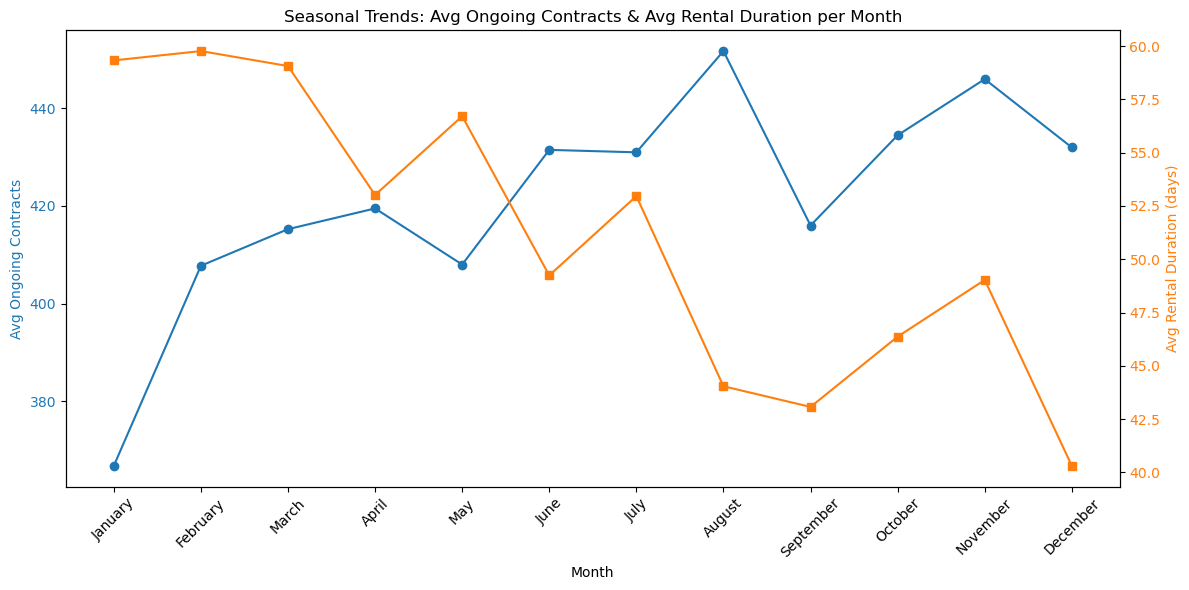

In [87]:
# Calculate the average number of ongoing contracts for each month (across all years)

import calendar
import matplotlib.pyplot as plt

# Ensure ongoing_df is defined
if 'ongoing_df' not in locals():
	# creating snapshot dates for ongoing contracts
	snapshot_start = pd.to_datetime("2021-01-01")
	snapshot_end = pd.to_datetime("2024-12-31")
	snapshot_dates = pd.date_range(start=snapshot_start, end=snapshot_end, freq='MS') + pd.DateOffset(days=14)

	def active_contracts_on(date, df):
		cond = (df["Start of rental"] <= date) & ((df["End of rental"] >= date) | (df["End of rental"].isna()))
		return df.loc[cond, "Order ID"].nunique()

	ongoing_data = []
	for date in snapshot_dates:
		count = active_contracts_on(date, df)
		ongoing_data.append({"Snapshot_Date": date, "Ongoing_Contracts": count})

	ongoing_df = pd.DataFrame(ongoing_data)
	ongoing_df["Year"] = ongoing_df["Snapshot_Date"].dt.year
	ongoing_df["Month"] = ongoing_df["Snapshot_Date"].dt.month.apply(lambda x: calendar.month_name[x])

# If avg_days_per_month is not defined, calculate it from df_no_annual
import calendar

if 'Start_Month' not in df_no_annual.columns:
	df_no_annual["Start_Month"] = df_no_annual["Start of rental"].dt.month.apply(lambda x: calendar.month_name[x])

if 'avg_days_per_month' not in locals():
	avg_days_per_month = df_no_annual.groupby("Start_Month")["Contract Duration (days)"].mean().reindex([
		"January", "February", "March", "April", "May", "June",
		"July", "August", "September", "October", "November", "December"
	])

# Calculate avg_ongoing_per_month from ongoing_df if not already defined
if 'avg_ongoing_per_month' not in locals():
	avg_ongoing_per_month = (
		ongoing_df.groupby("Month")["Ongoing_Contracts"]
		.mean()
		.reindex([
			"January", "February", "March", "April", "May", "June",
			"July", "August", "September", "October", "November", "December"
		])
	)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Ongoing Contracts', color=color1)
ax1.plot(avg_ongoing_per_month.index, avg_ongoing_per_month.values, marker='o', color=color1, label='Avg Ongoing Contracts')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(avg_ongoing_per_month.index, rotation=45)

# Second y-axis for average days of rental
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Avg Rental Duration (days)', color=color2)
ax2.plot(avg_days_per_month.index, avg_days_per_month.values, marker='s', color=color2, label='Avg Rental Duration (days)')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Seasonal Trends: Avg Ongoing Contracts & Avg Rental Duration per Month")
fig.tight_layout()
plt.show()


ANALYSIS QUESTION:   
How do rental volume and average contract duration fluctuate throughout the year, and how should these patterns guide pricing, fleet availability, and maintenance planning?

DATA FINDING:  
- Contract volume climbs steadily from January to August, peaking in late summer (August) with ~450 ongoing contracts.
- Average contract durations are highest in January–March (~60 days), reflecting longer, planned winter deployments, then drop sharply to ~40–45 days in August–September, driven by fast-paced summer project cycles.
- December reflects a simultaneous dip in both metrics—volume and duration—likely tied to holiday closures and budget cycles.

INSIGHTS:  
The business operates on a predictable seasonal cycle:
Winter months are ideal for longer-term contracts and preventive maintenance, as customers commit to extended rentals with lower volume.
Summer requires high fleet availability and short-term pricing flexibility to meet increased demand and quick project turnovers.
End-of-year strategies should anticipate December slowdowns with tailored promotions, flexible terms, or bundled offers to maintain engagement and optimize idle inventory.
By adapting fleet management, pricing tiers, and customer outreach to these cycles, the company can maximize both utilization and revenue stability year-round.

  Rental_Type  Pct_of_4yrs
0      Annual    22.426992
1       Daily    31.229293
2     Monthly    46.343715
  Rental_Type  NormalizedPct
0      Annual      43.581544
1       Daily      26.443395
2     Monthly      29.975061


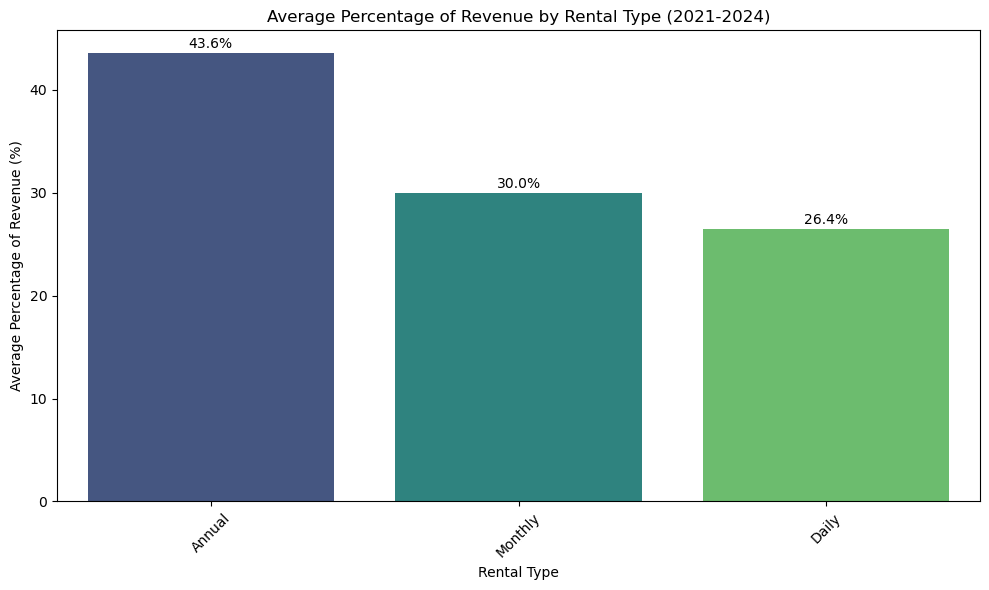

In [88]:
# calculate the total revenue by year and rental type
total_rev_by_type = (
    df
    .groupby('Rental_Type')['Amount']
    .sum()
    .reset_index(name='TotalRevenue')
)
grand_total = total_rev_by_type['TotalRevenue'].sum()
total_rev_by_type['Pct_of_4yrs'] = 100 * total_rev_by_type['TotalRevenue'] / grand_total
print(total_rev_by_type[['Rental_Type','Pct_of_4yrs']])

# Ensure rev_by_year_type exists
rev_by_year_type = (
    df.assign(Year=df['Start of rental'].dt.year)
    .groupby(['Year', 'Rental_Type'])['Amount']
    .sum()
    .reset_index(name='Revenue')
)

rev_by_year_type['Pct'] = (
    rev_by_year_type
    .groupby('Year')['Revenue']
    .transform(lambda x: 100 * x / x.sum())
)
# 4-year average per type
avg_pct = (
    rev_by_year_type
    .groupby('Rental_Type')['Pct']
    .mean()
    .reset_index(name='AvgPct')
)
# Normalize to sum to 100%
total_avg = avg_pct['AvgPct'].sum()
avg_pct['NormalizedPct'] = 100 * avg_pct['AvgPct'] / total_avg
print(avg_pct[['Rental_Type','NormalizedPct']])

# Plotting the average percentage of revenue by rental type
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_pct.sort_values('NormalizedPct', ascending=False),
    x='Rental_Type',
    y='NormalizedPct',
    palette='viridis'
)
plt.title('Average Percentage of Revenue by Rental Type (2021-2024)')
plt.xlabel('Rental Type')
plt.ylabel('Average Percentage of Revenue (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# SHOW THE PERCENTAGE VALUES on the bars
for i, row in avg_pct.sort_values('NormalizedPct', ascending=False).reset_index(drop=True).iterrows():
    plt.text(
        i,
        row['NormalizedPct'] + 0.5,
        f"{row['NormalizedPct']:.1f}%",
        ha='center'
    )

plt.show()



ANALYSIS QUESTION:  
How does each rental type contribute to total revenue, and what strategic adjustments could enhance profitability across durations?

DATA FINDING:  
- Annual contracts bring in the largest share of revenue (~43.6%), despite being less frequent.
- Monthly rentals follow at ~30%, showing consistent mid-term demand.
- Daily rentals, while common, generate the smallest share (~26.4%), likely due to lower margins.

INSIGHT:  
Annual contracts are the foundation of revenue stability and should be protected with competitive terms and renewal strategies.
Monthly rentals show growth potential—targeted upselling or bundling here could boost returns.
Daily rentals require utilization optimization and seasonal pricing to make their high volume more profitable. A balanced mix ensures long-term resilience and flexibility across market cycles.

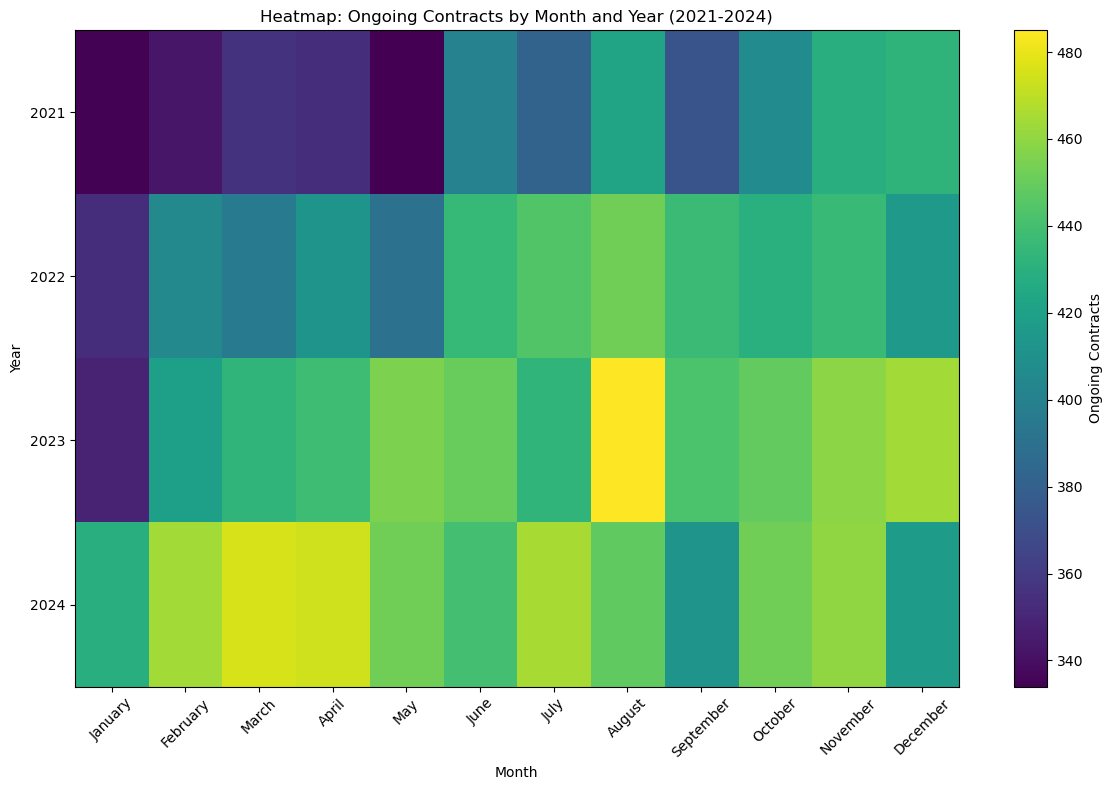

In [89]:
# Ensure the date columns are datetime.
df["Start of rental"] = pd.to_datetime(df["Start of rental"])
df["End of rental"] = pd.to_datetime(df["End of rental"])

# --- Step 1: Define Snapshot Dates ---
# Limit snapshots to the period January 2021 to December 2024.
snapshot_start = pd.to_datetime("2021-01-01")
snapshot_end = pd.to_datetime("2024-12-31")
# Create snapshots on the 15th day of each month.
snapshot_dates = pd.date_range(start=snapshot_start, end=snapshot_end, freq='MS') + pd.DateOffset(days=14)

# --- Step 2: Count Ongoing Contracts for Each Snapshot ---
def active_contracts_on(date, df):
    # A contract is active if its start is on or before the snapshot date and its end is after or equal to the snapshot.
    cond = (df["Start of rental"] <= date) & ((df["End of rental"] >= date) | (df["End of rental"].isna()))
    return df.loc[cond, "Order ID"].nunique()

ongoing_data = []
for date in snapshot_dates:
    count = active_contracts_on(date, df)
    ongoing_data.append({"Snapshot_Date": date, "Ongoing_Contracts": count})
    
ongoing_df = pd.DataFrame(ongoing_data)

# --- Step 3: Extract Year and Month from Snapshot Dates ---
ongoing_df["Year"] = ongoing_df["Snapshot_Date"].dt.year
ongoing_df["Month"] = ongoing_df["Snapshot_Date"].dt.month.apply(lambda x: calendar.month_name[x])

# Define month order.
month_order = list(calendar.month_name)[1:]  # January to December

# --- Step 4: Create a Pivot Table (Year as rows, Month as columns) ---
# Here, each cell represents the number of active contracts on that snapshot.
ongoing_pivot = ongoing_df.pivot(index="Year", columns="Month", values="Ongoing_Contracts").fillna(0)

# Enforce the proper month order.
ongoing_pivot = ongoing_pivot[month_order]

# --- Step 5: Visualization - Heatmap ---
plt.figure(figsize=(12, 8))
plt.imshow(ongoing_pivot, aspect="auto", cmap="viridis")
plt.colorbar(label="Ongoing Contracts")
plt.xticks(ticks=np.arange(len(month_order)), labels=month_order, rotation=45)
plt.yticks(ticks=np.arange(len(ongoing_pivot.index)), labels=ongoing_pivot.index)
plt.title("Heatmap: Ongoing Contracts by Month and Year (2021-2024)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


ANALYSIS QUESTION:  
How have ongoing contract volumes evolved over time, and what seasonal patterns should guide fleet and operational planning?

DATA FINDING:  
- Year-over-year growth: January contracts rose from ~325 in 2021 to >425 in 2024—showing consistent demand expansion.
- Seasonality persists: Each year peaks in August, with lows in winter (Jan–Mar) and minor rebounds in Oct–Nov.
- 2024 stands out with a strong March–April surge and sharper August peak (~485 contracts).

INSIGHTS:    
The business is experiencing both structural growth and cyclical demand.
To keep up, the company must scale fleet and support capacity annually, while still planning for seasonal spikes mid-year and downtime windows in winter for maintenance and fleet rotation.

FINAL REMARKS OF THE SEASONALITY ANALYSIS

The analysis highlights a steadily growing demand baseline from 2021 to 2024, paired with consistent seasonal patterns. Each year follows a repeatable cycle: low activity in winter, a strong ramp-up in spring, a demand peak in summer (especially August), followed by a brief dip and a modest rebound before year-end.

Daily contracts dominate during spring (March–June) and late-year months (November–December), reflecting customers’ preference for short-term flexibility during project kick-offs and wrap-ups. In contrast, annual contracts, while fewer in volume, contribute significantly to revenue stability—peaking in February (post-budget resets) and July (mid-project expansions). Monthly leases act as a steady middle ground, peaking in May as customers transition from initial daily usage to more structured medium-term needs.

These trends suggest a two-pronged strategic approach:

🔄 Maximize volume and fleet utilization during peak short-term periods by offering dynamic pricing and ensuring high availability.          
📈 Secure stable revenue by promoting monthly and annual contracts during planning-heavy windows like February and July.

In summary, customer behavior is highly pragmatic: they lock into long-term deals when budgets allow, and rely on short-term rentals when speed and flexibility matter most. The company should align its fleet planning, pricing strategy, and promotional efforts with these cyclical rhythms to optimize both utilization and profitability across the year.

Demand Forecasting

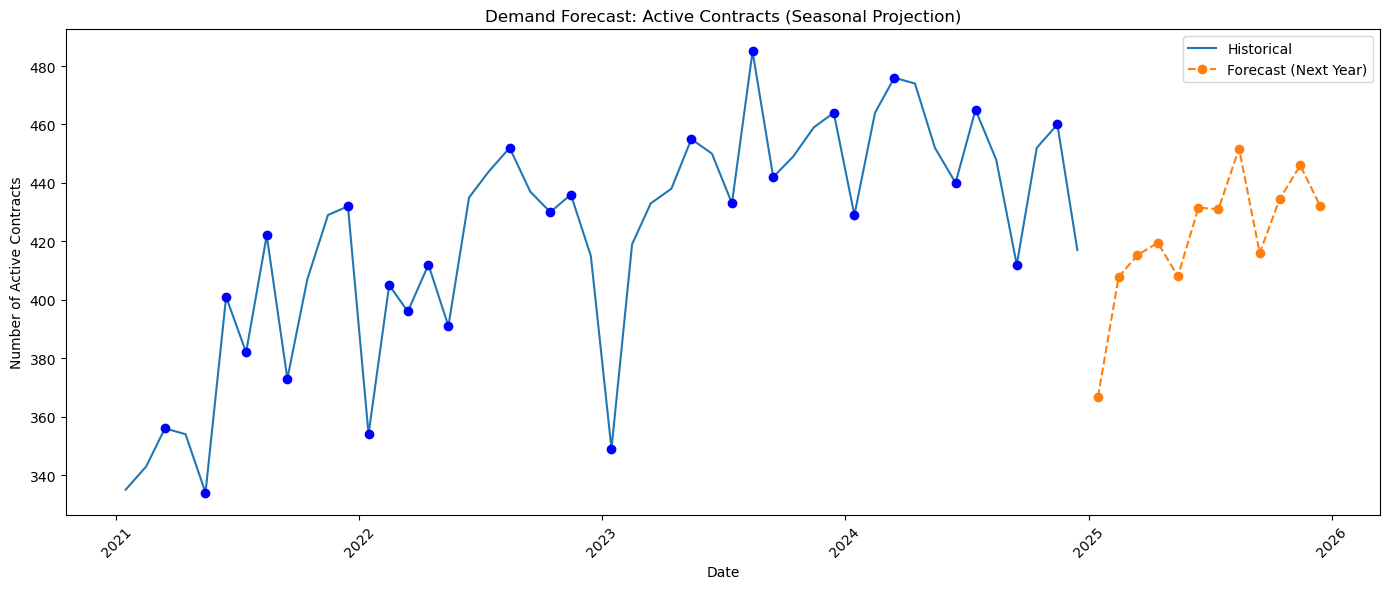

   snapshot_date  forecasted_active_contracts
0     2025-01-15                       366.75
1     2025-02-15                       407.75
2     2025-03-15                       415.25
3     2025-04-15                       419.50
4     2025-05-15                       408.00
5     2025-06-15                       431.50
6     2025-07-15                       431.00
7     2025-08-15                       451.75
8     2025-09-15                       416.00
9     2025-10-15                       434.50
10    2025-11-15                       446.00
11    2025-12-15                       432.00


In [90]:
from scipy.signal import find_peaks

# Use ongoing_df from previous cells, which has 'Ongoing_Contracts' and 'Snapshot_Date'
active_contracts = ongoing_df.rename(columns={
    "Ongoing_Contracts": "active_contracts",
    "Snapshot_Date": "snapshot_date"
})

active_contracts['Month'] = active_contracts['snapshot_date'].dt.month
active_contracts['Year'] = active_contracts['snapshot_date'].dt.year

# Calculate average active contracts per month (seasonality pattern)
monthly_seasonality = (
    active_contracts.groupby('Month')['active_contracts']
    .mean()
    .reindex(range(1, 13))
    .values
)

# Forecast for next year (e.g., 2025)
forecast_year = active_contracts['Year'].max() + 1
# Generate exactly 12 forecast dates, one for each month (on the 15th)
forecast_dates = pd.date_range(
    start=f"{forecast_year}-01-01", periods=12, freq='MS'
) + pd.DateOffset(days=14)

forecast_df = pd.DataFrame({
    'snapshot_date': forecast_dates,
    'forecasted_active_contracts': monthly_seasonality
})

plt.figure(figsize=(14, 6))
plt.plot(active_contracts['snapshot_date'], active_contracts['active_contracts'], label='Historical')
plt.plot(forecast_df['snapshot_date'], forecast_df['forecasted_active_contracts'], 'o--', label='Forecast (Next Year)')

# Highlight peaks (local maxima) in the historical data
# Find peaks (local maxima)
y_hist = active_contracts['active_contracts'].values
peaks, _ = find_peaks(y_hist)
plt.plot(
    active_contracts['snapshot_date'].iloc[peaks],
    y_hist[peaks],
    'bo'
)

# Find lows (local minima) by inverting the signal
lows, _ = find_peaks(-y_hist)
plt.plot(
    active_contracts['snapshot_date'].iloc[lows],
    y_hist[lows],
    'bo'
)

plt.xlabel("Date")
plt.ylabel("Number of Active Contracts")
plt.title("Demand Forecast: Active Contracts (Seasonal Projection)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(forecast_df)


INSIGHT:
The seasonal-naïve forecast for 2025 mirrors historical trends from 2021–2024, projecting:
- A low point of ~360 active contracts in January,
- A steady rise to ~430 by late spring,
- A summer plateau, followed by a slight decline into autumn.
- While it doesn’t repeat the sharp August 2024 spike (~480), the forecast curve remains predictably cyclical, confirming the consistency of seasonal demand.

🔧 Operational Implication:

This month-by-month forecast offers a reliable blueprint for:

- Fleet sizing: Avoid overcapacity in winter, ensure full availability in spring/summer.
- Staffing and maintenance: Schedule downtime and repairs during off-peak months.
- Strategic planning: Adjust pricing, marketing, and rental terms in sync with seasonal rhythms.
- In short, historical seasonality is a dependable guide for aligning supply with demand while optimizing operational efficiency year-round.